# Popular Models and Ensemble Pipeline 

## Naive Bayes 

In [ ]:
#Naive Bayes
#basics
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y)
model.predict(X_new) #model.predict_proba(Xnew)

In [1]:
#Example - Classifying text
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
categories = ['talk.religion.misc','soc.religion.christian','sci.space','comp.graphics']
train = fetch_20newsgroups(subset='train',categories=categories)
test = fetch_20newsgroups(subset='test',categories=categories)
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



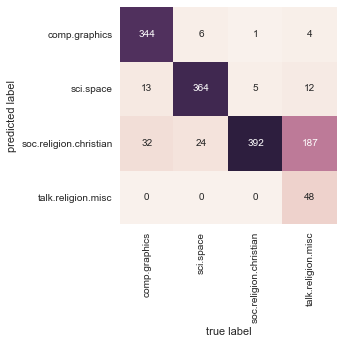

In [9]:
#Data prepration and pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(),MultinomialNB())
model.fit(train.data,train.target)
labels = model.predict(test.data)

#Evaluation
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target,labels)

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=train.target_names,yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [11]:
# use of TfidfVectorizer()
new_data = TfidfVectorizer(train.data) # how to use TfidfVectorizer on a given column? 
new_data

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8',
        input=["From: jono@mac-ak-24.rtsg.mot.com (Jon Ogden)\nSubject: Re: Losing your temper is not a Christian trait\nOrganization: Motorola LPA Development\nLines: 26\n\nIn article <Apr.23.02.55.47.1993.3138@geneva.rutgers.edu>, jcj@tellabs.com\n(jcj) wrote:\n\n> I'd like to remind people of the witheri...-------------\nFred.McCall@dseg.ti.com - I don\'t speak for others and they don\'t speak for me.\n'],
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

## Linear Regression 

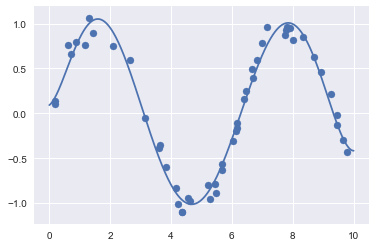

In [19]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_model = make_pipeline(PolynomialFeatures(7),LinearRegression())

rng = np.random.RandomState(0)
x = 10*rng.rand(50)
y = np.sin(x) + 0.1*rng.randn(50)

poly_model.fit(x[:,np.newaxis],y)
xfit = np.linspace(0,10,1000)
yfit = poly_model.predict(xfit[:,np.newaxis])

plt.scatter(x,y)
plt.plot(xfit,yfit)

In [21]:
poly_model.coef_ #how to get coefficients and odds ratio if possible? 

AttributeError: 'Pipeline' object has no attribute 'coef_'

In [ ]:
#Ridge and Lasso Regression
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30),Ridge(alpha=0.1)) 
#or 
from sklearn.linear_model import lasso
model = make_pipeline(GaussianFeatures(30),Lasso(alpha-0.001))

## Support Vector Machines

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='rbf',class_weight='balanced',C=1E6) # or kernel = 'linear' 
model.fit(X,y)

## Decision Trees and Random Forests

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
#Random Forests
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree,n_estimators=100,max_samples=0.8,random_state=1)
bag.fit(X,y)
#
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,random_state-0)
#
from sklearn.cross_validation import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(digits.data,digits.target,random_state=0)
model = RandomForestClassifier(n_estimator=1000)
model.fit(Xtrain,ytrain)
ypred = model.predict(Xtest)
from sklearn import metrics
print(metrics.classification_report(ypred,ytest))
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest,ypred)
sns.heatmap(mat.T,sqare=True,annot=True,fmt='d',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

## Principal Component Analysis

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seaborn
seaborn.set()
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(2) # project from 64 to 2 dimentions
pca.fit(digits.data)
projected = pca.transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


C:\Users\Insights\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


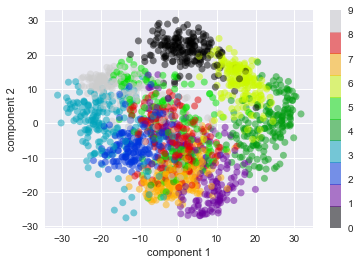

In [8]:
plt.scatter(projected[:,0],projected[:,1],c=digits.target,edgecolor='none',alpha=0.5,cmap=plt.cm.get_cmap('spectral',10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

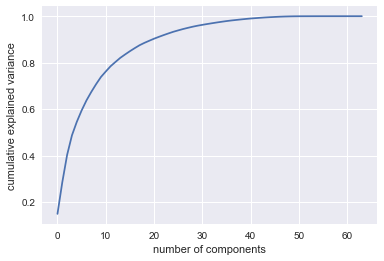

In [9]:
#choose the number of components
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [12]:
#Transform it back
new = pca.inverse_transform(projected)
new.shape

(1797, 64)

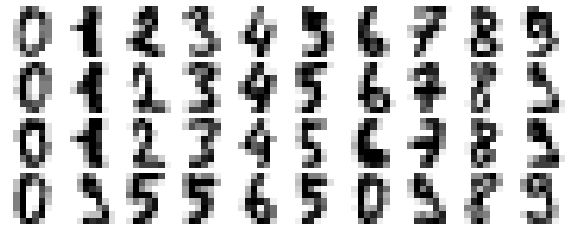

In [13]:
#plot function
def plot_digits(data):
    fig,axes = plt.subplots(4,10,figsize=(10,4),subplot_kw={'xticks':[],'yticks':[]},
                           gridspec_kw=dict(hspace=0.1,wspace=0.1))
    for i,ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),cmap='binary',interpolation='nearest',clim=(0,16))
plot_digits(digits.data)

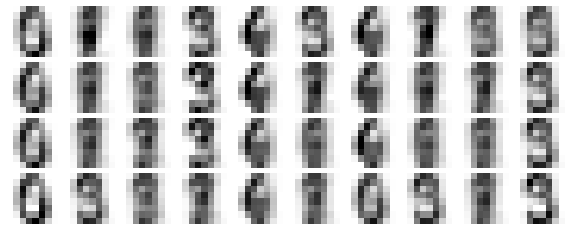

In [14]:
plot_digits(new)

## Manifold Learning 

In [16]:
#Isomap example
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist.data.shape

(70000, 784)

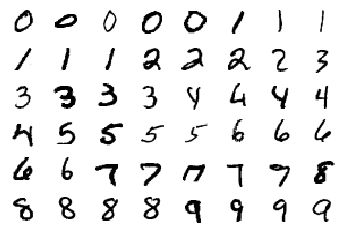

In [17]:
fig, ax = plt.subplots(6,8,subplot_kw=dict(xticks=[],yticks=[]))
for i,axi in enumerate(ax.flat):
    axi.imshow(mnist.data[1250*i].reshape(28,28),cmap='gray_r')

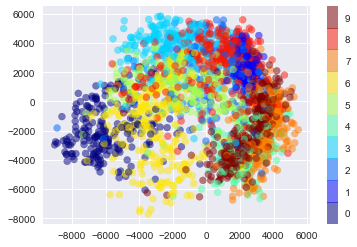

In [23]:
from sklearn.manifold import Isomap
data = mnist.data[::30]
target = mnist.target[::30]
model = Isomap(n_components=2)
proj = model.fit_transform(data)
plt.scatter(proj[:,0],proj[:,1],c=target,cmap=plt.cm.get_cmap('jet',10),alpha=0.5)
plt.colorbar(ticks=range(10))
plt.clim(-0.5,9.5)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 2334
[t-SNE] Computed conditional probabilities for sample 2000 / 2334
[t-SNE] Computed conditional probabilities for sample 2334 / 2334
[t-SNE] Mean sigma: 579.723479
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.190465
[t-SNE] Error after 325 iterations: 1.190465


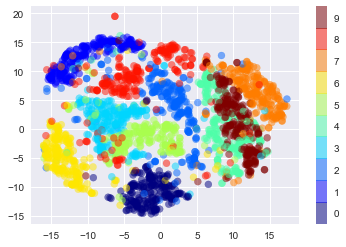

In [24]:
from sklearn.manifold import TSNE
tsne3 = TSNE(n_components=2, verbose=1, perplexity=40)
proj = tsne3.fit_transform(data)
plt.scatter(proj[:,0],proj[:,1],c=target,cmap=plt.cm.get_cmap('jet',10),alpha=0.5)
plt.colorbar(ticks=range(10))
plt.clim(-0.5,9.5)

## K-means 

In [ ]:
from sklearn.cluster import KMeans #MiniBatchKMeans
kmeans = KMeans(n_cluster=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

## Gaussian Mixture Models 

In [ ]:
from sklearn.mixture import GMM
gmm = GMM(n_components=4).fit(X) # gmm = GMM(n_components=4,covariance_type='full',random_state=42)
labels = gmm.predict(X) #gmm.predict_proba


## Xgboost

In [28]:
import numpy
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data
dataset = numpy.loadtxt('C:/Users/Insights/Desktop/Training/pima-indians-diabetes.txt', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.95%


## Hyperparameter Tuning

## Model Selection and Ensembling